<a href="https://colab.research.google.com/github/Deepachowdhari/GenAI/blob/main/FcialExpressionYOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install ultralytics

In [22]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [23]:
from ultralytics import YOLO
from IPython.display import Image

In [24]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [25]:
dataset.location

'/content/Facial-Emotion-Dataset--3'

In [29]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Facial-Emotion-Dataset--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

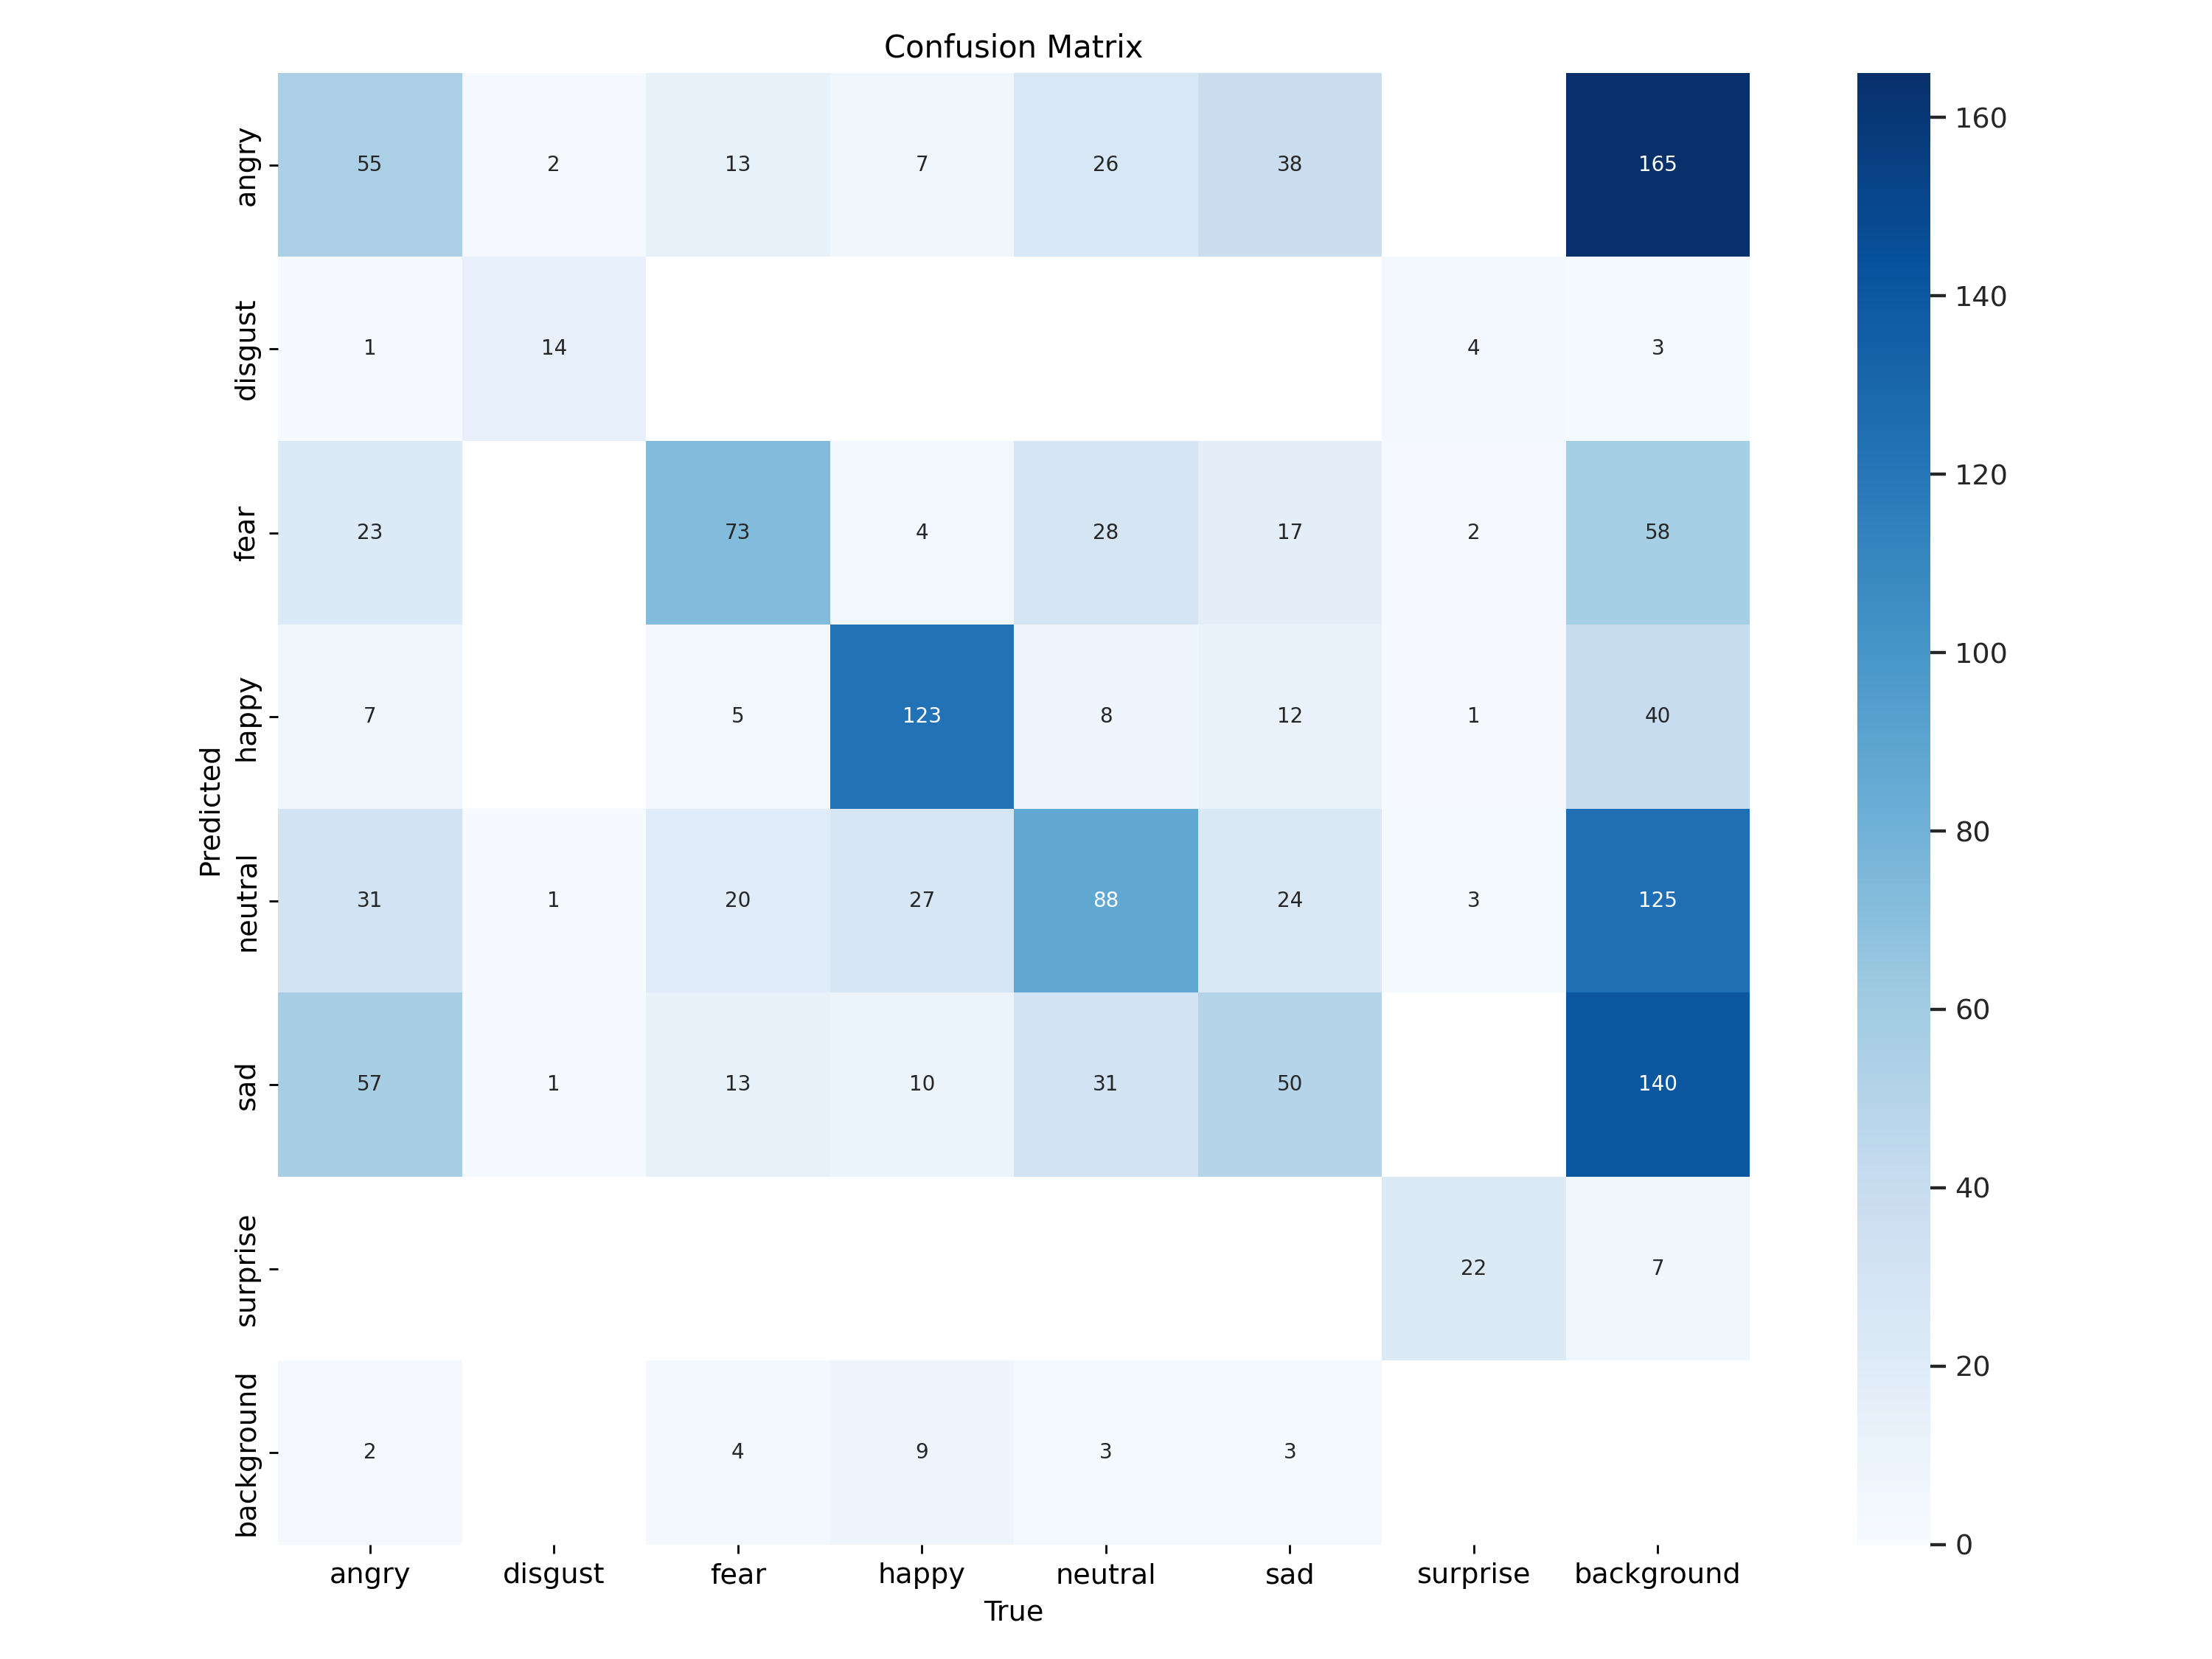

In [30]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

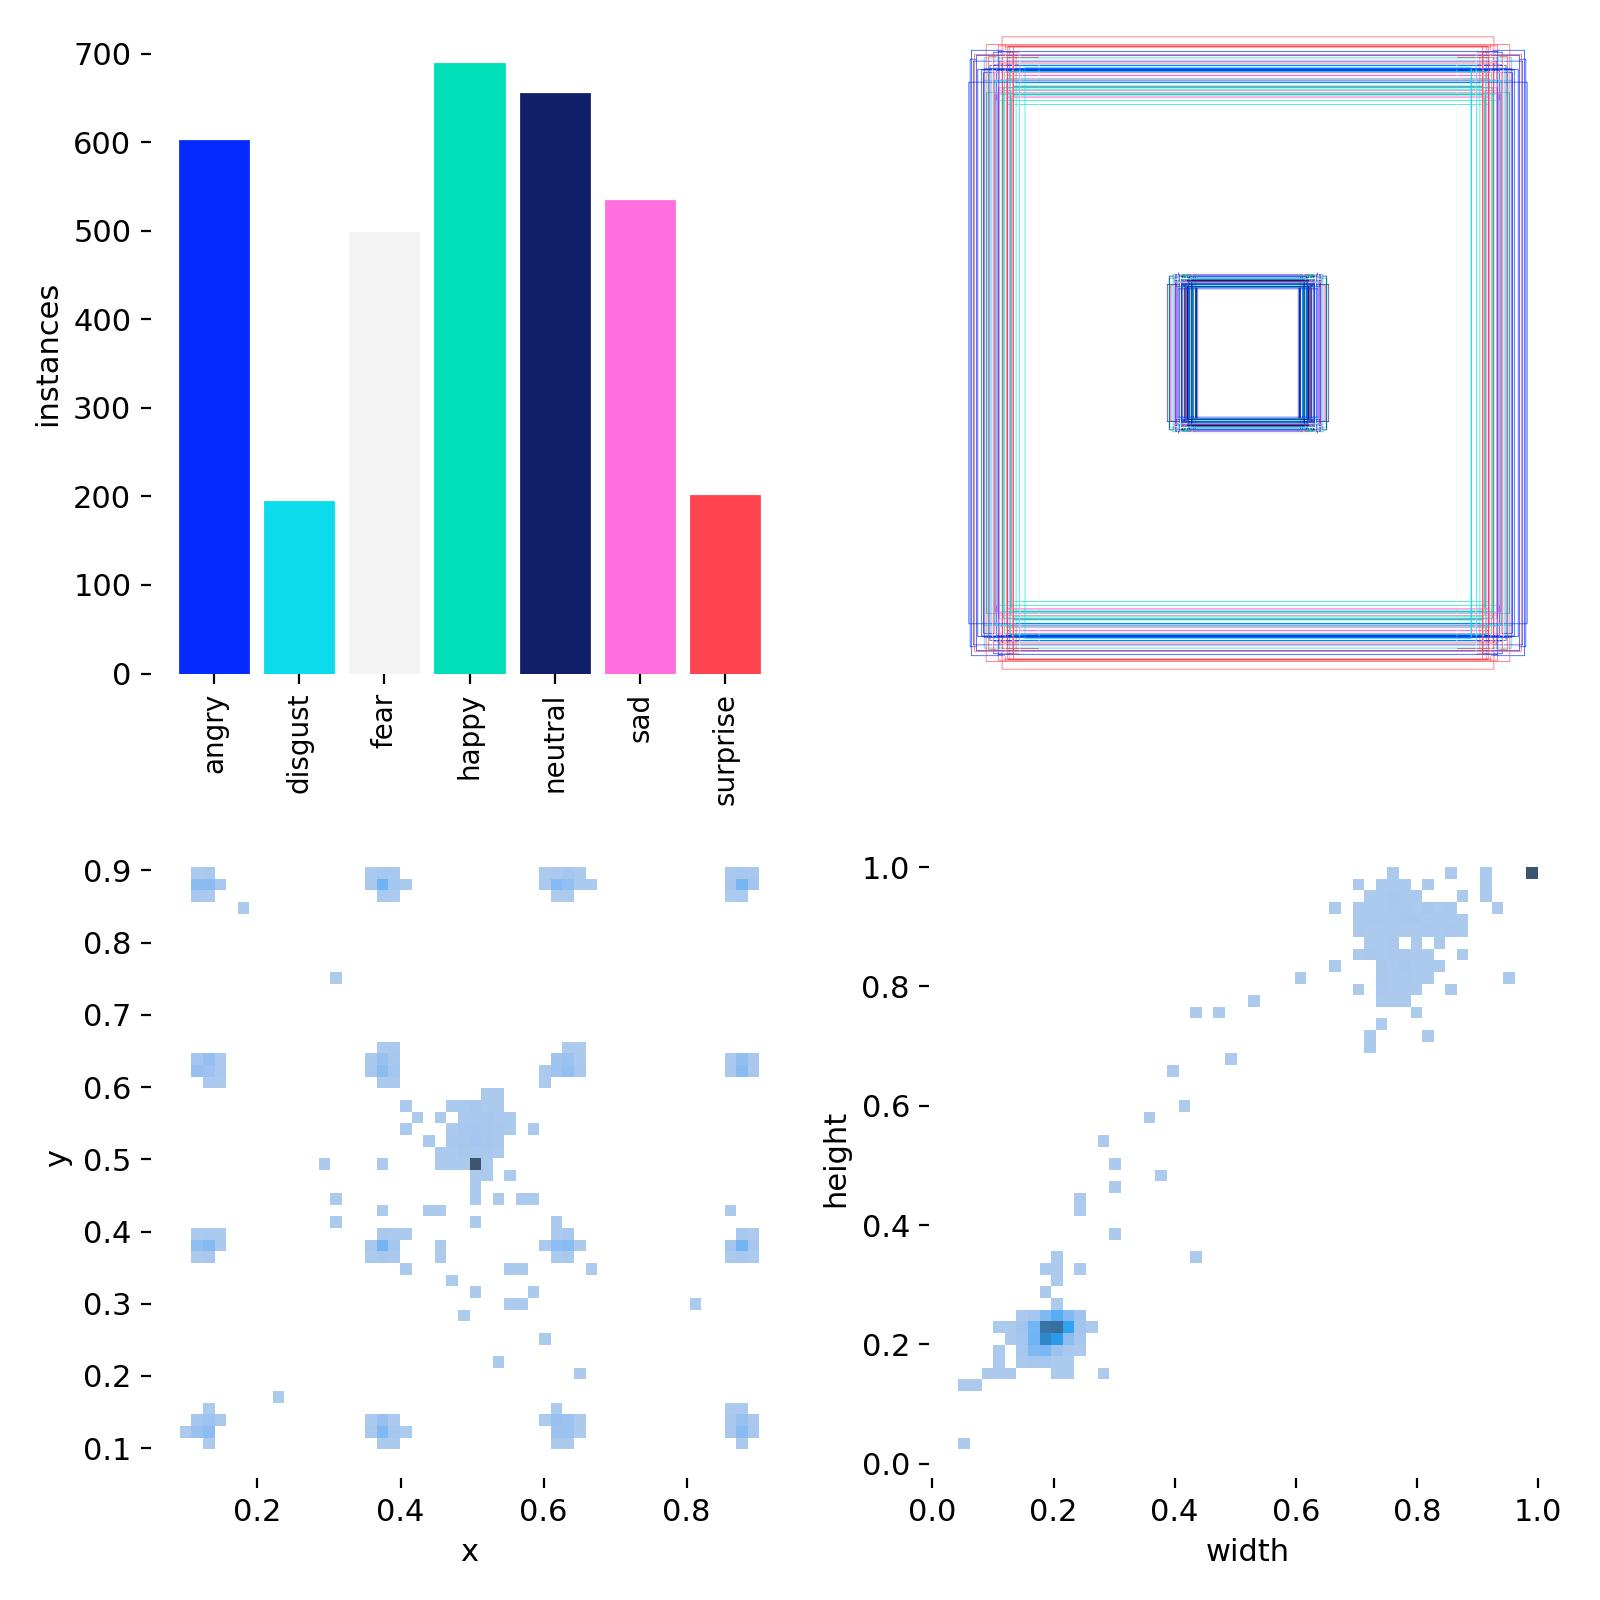

In [31]:
Image("/content/runs/detect/train/labels.jpg", width=600)

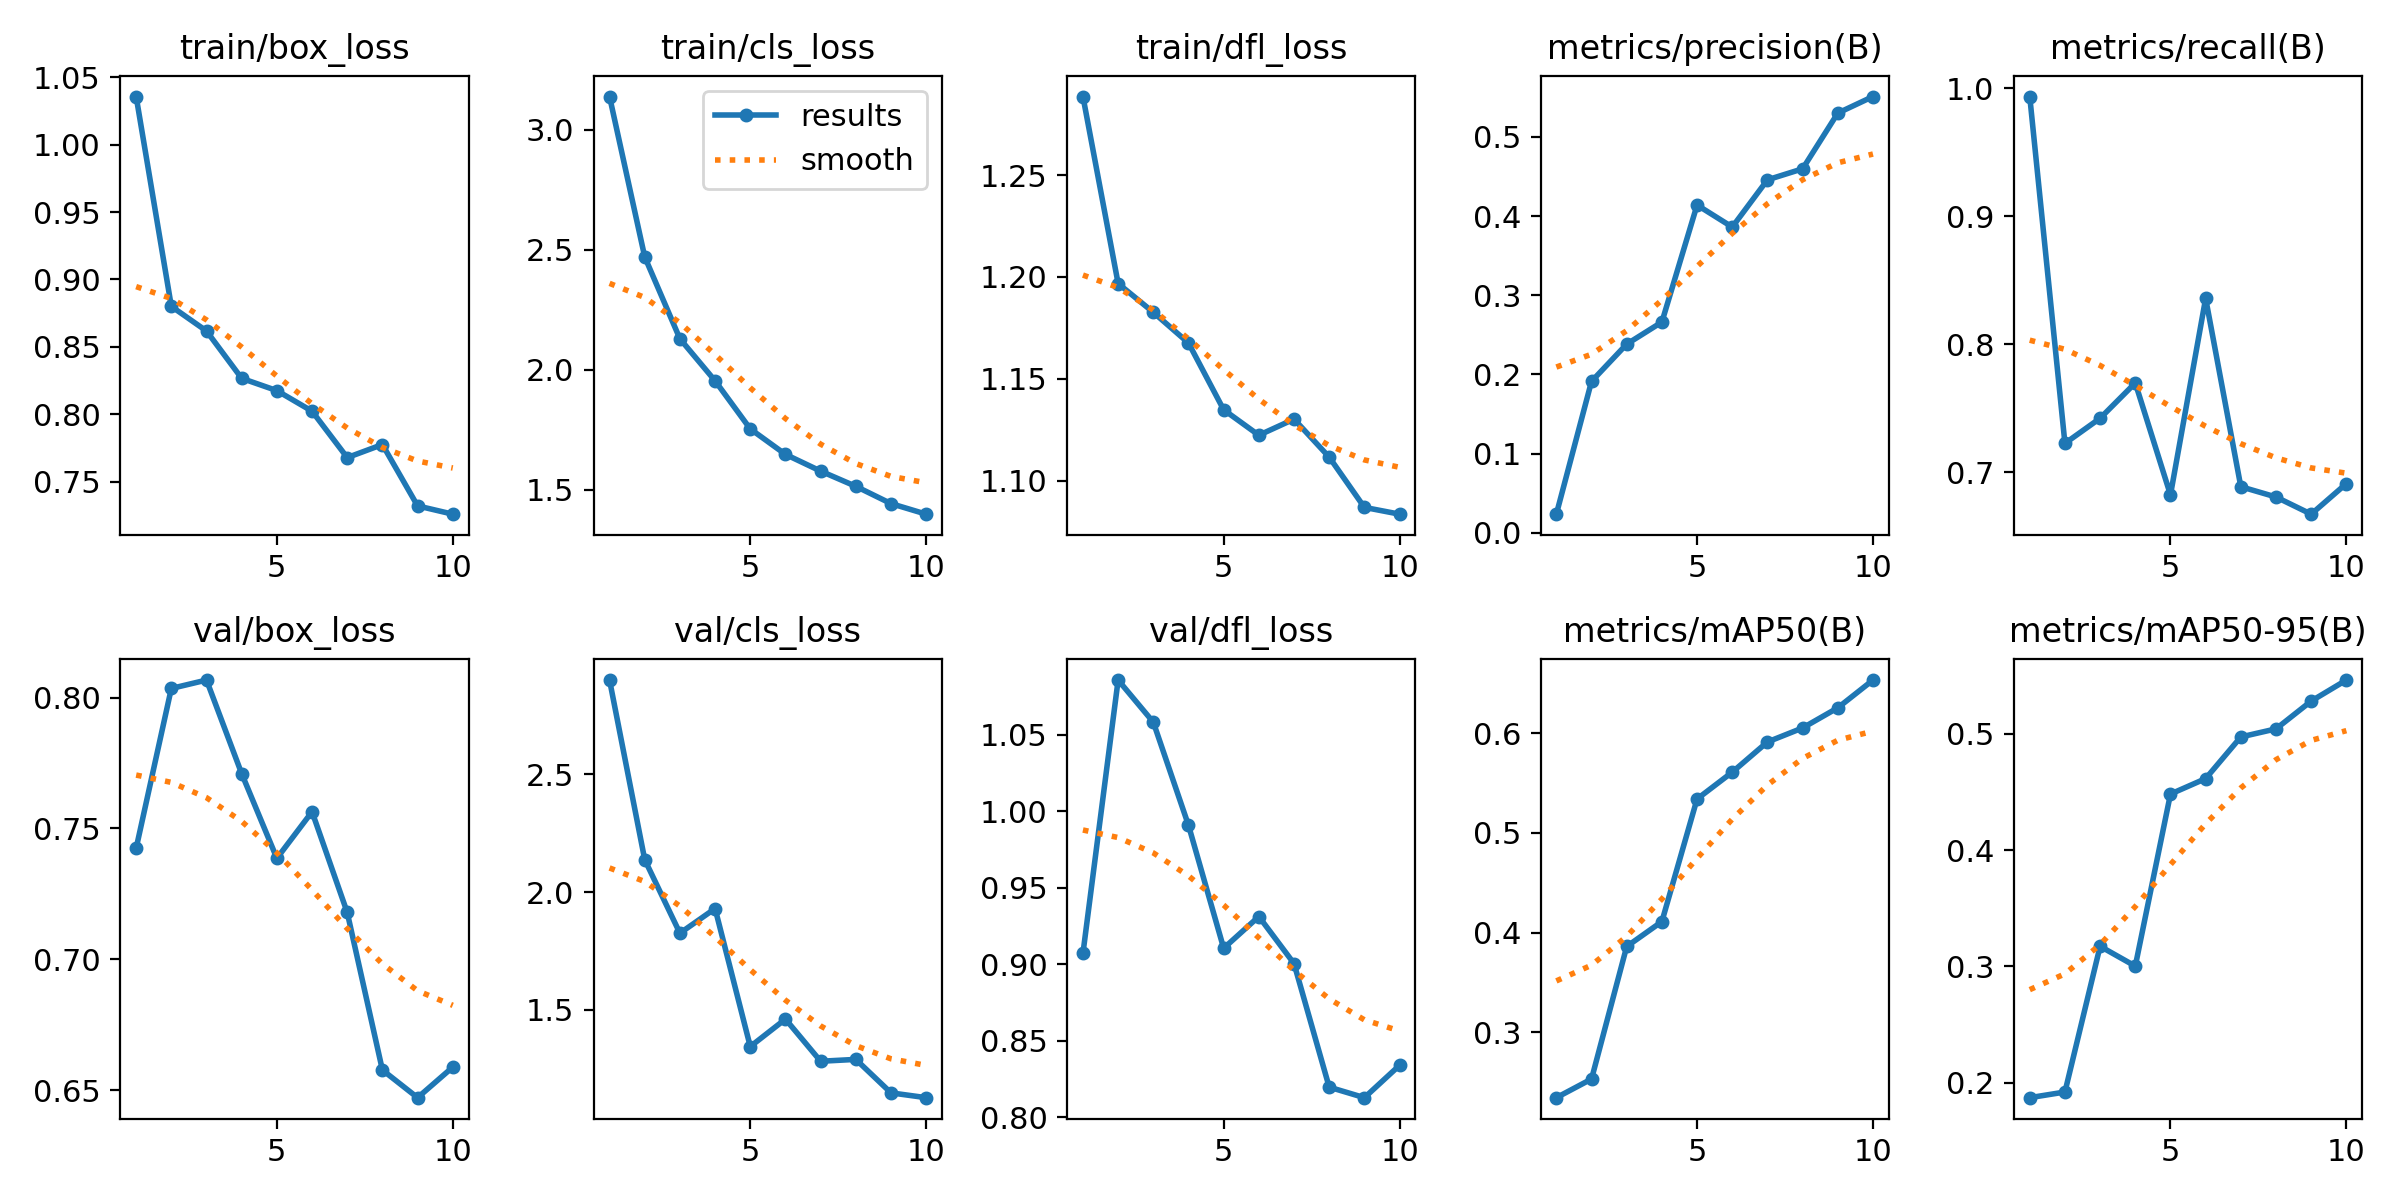

In [32]:
Image("/content/runs/detect/train/results.png", width=600)

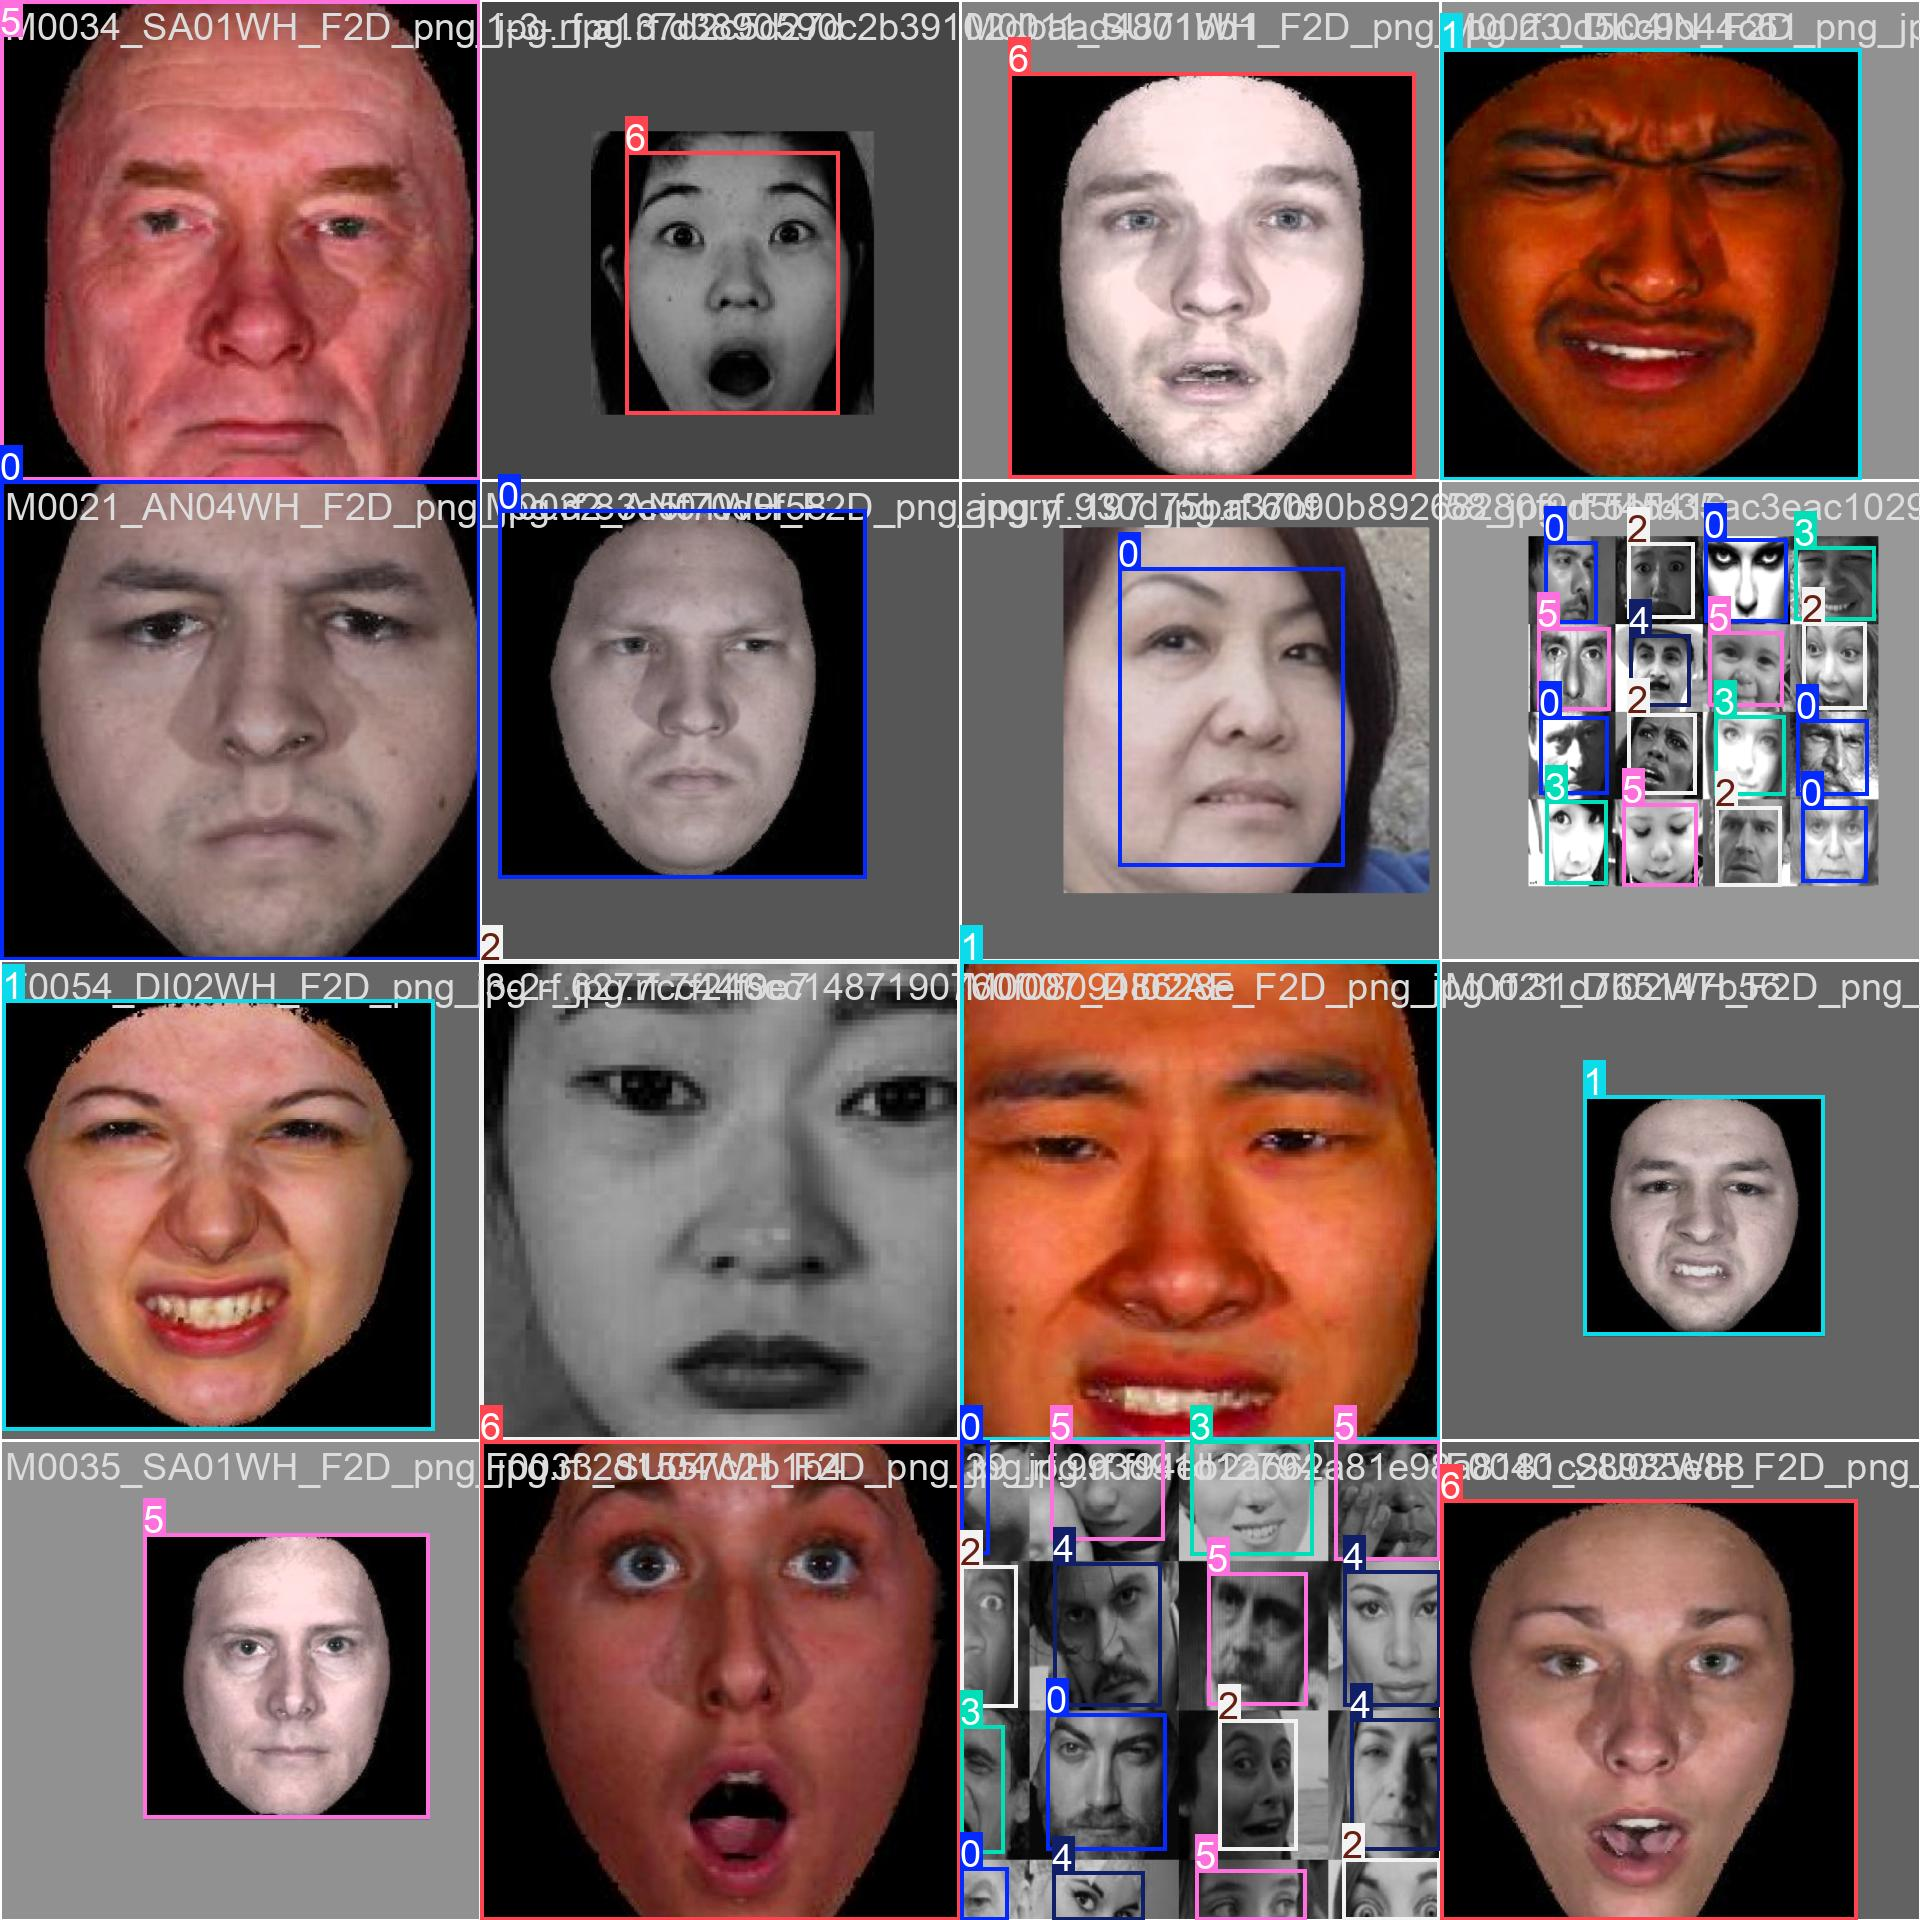

In [33]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

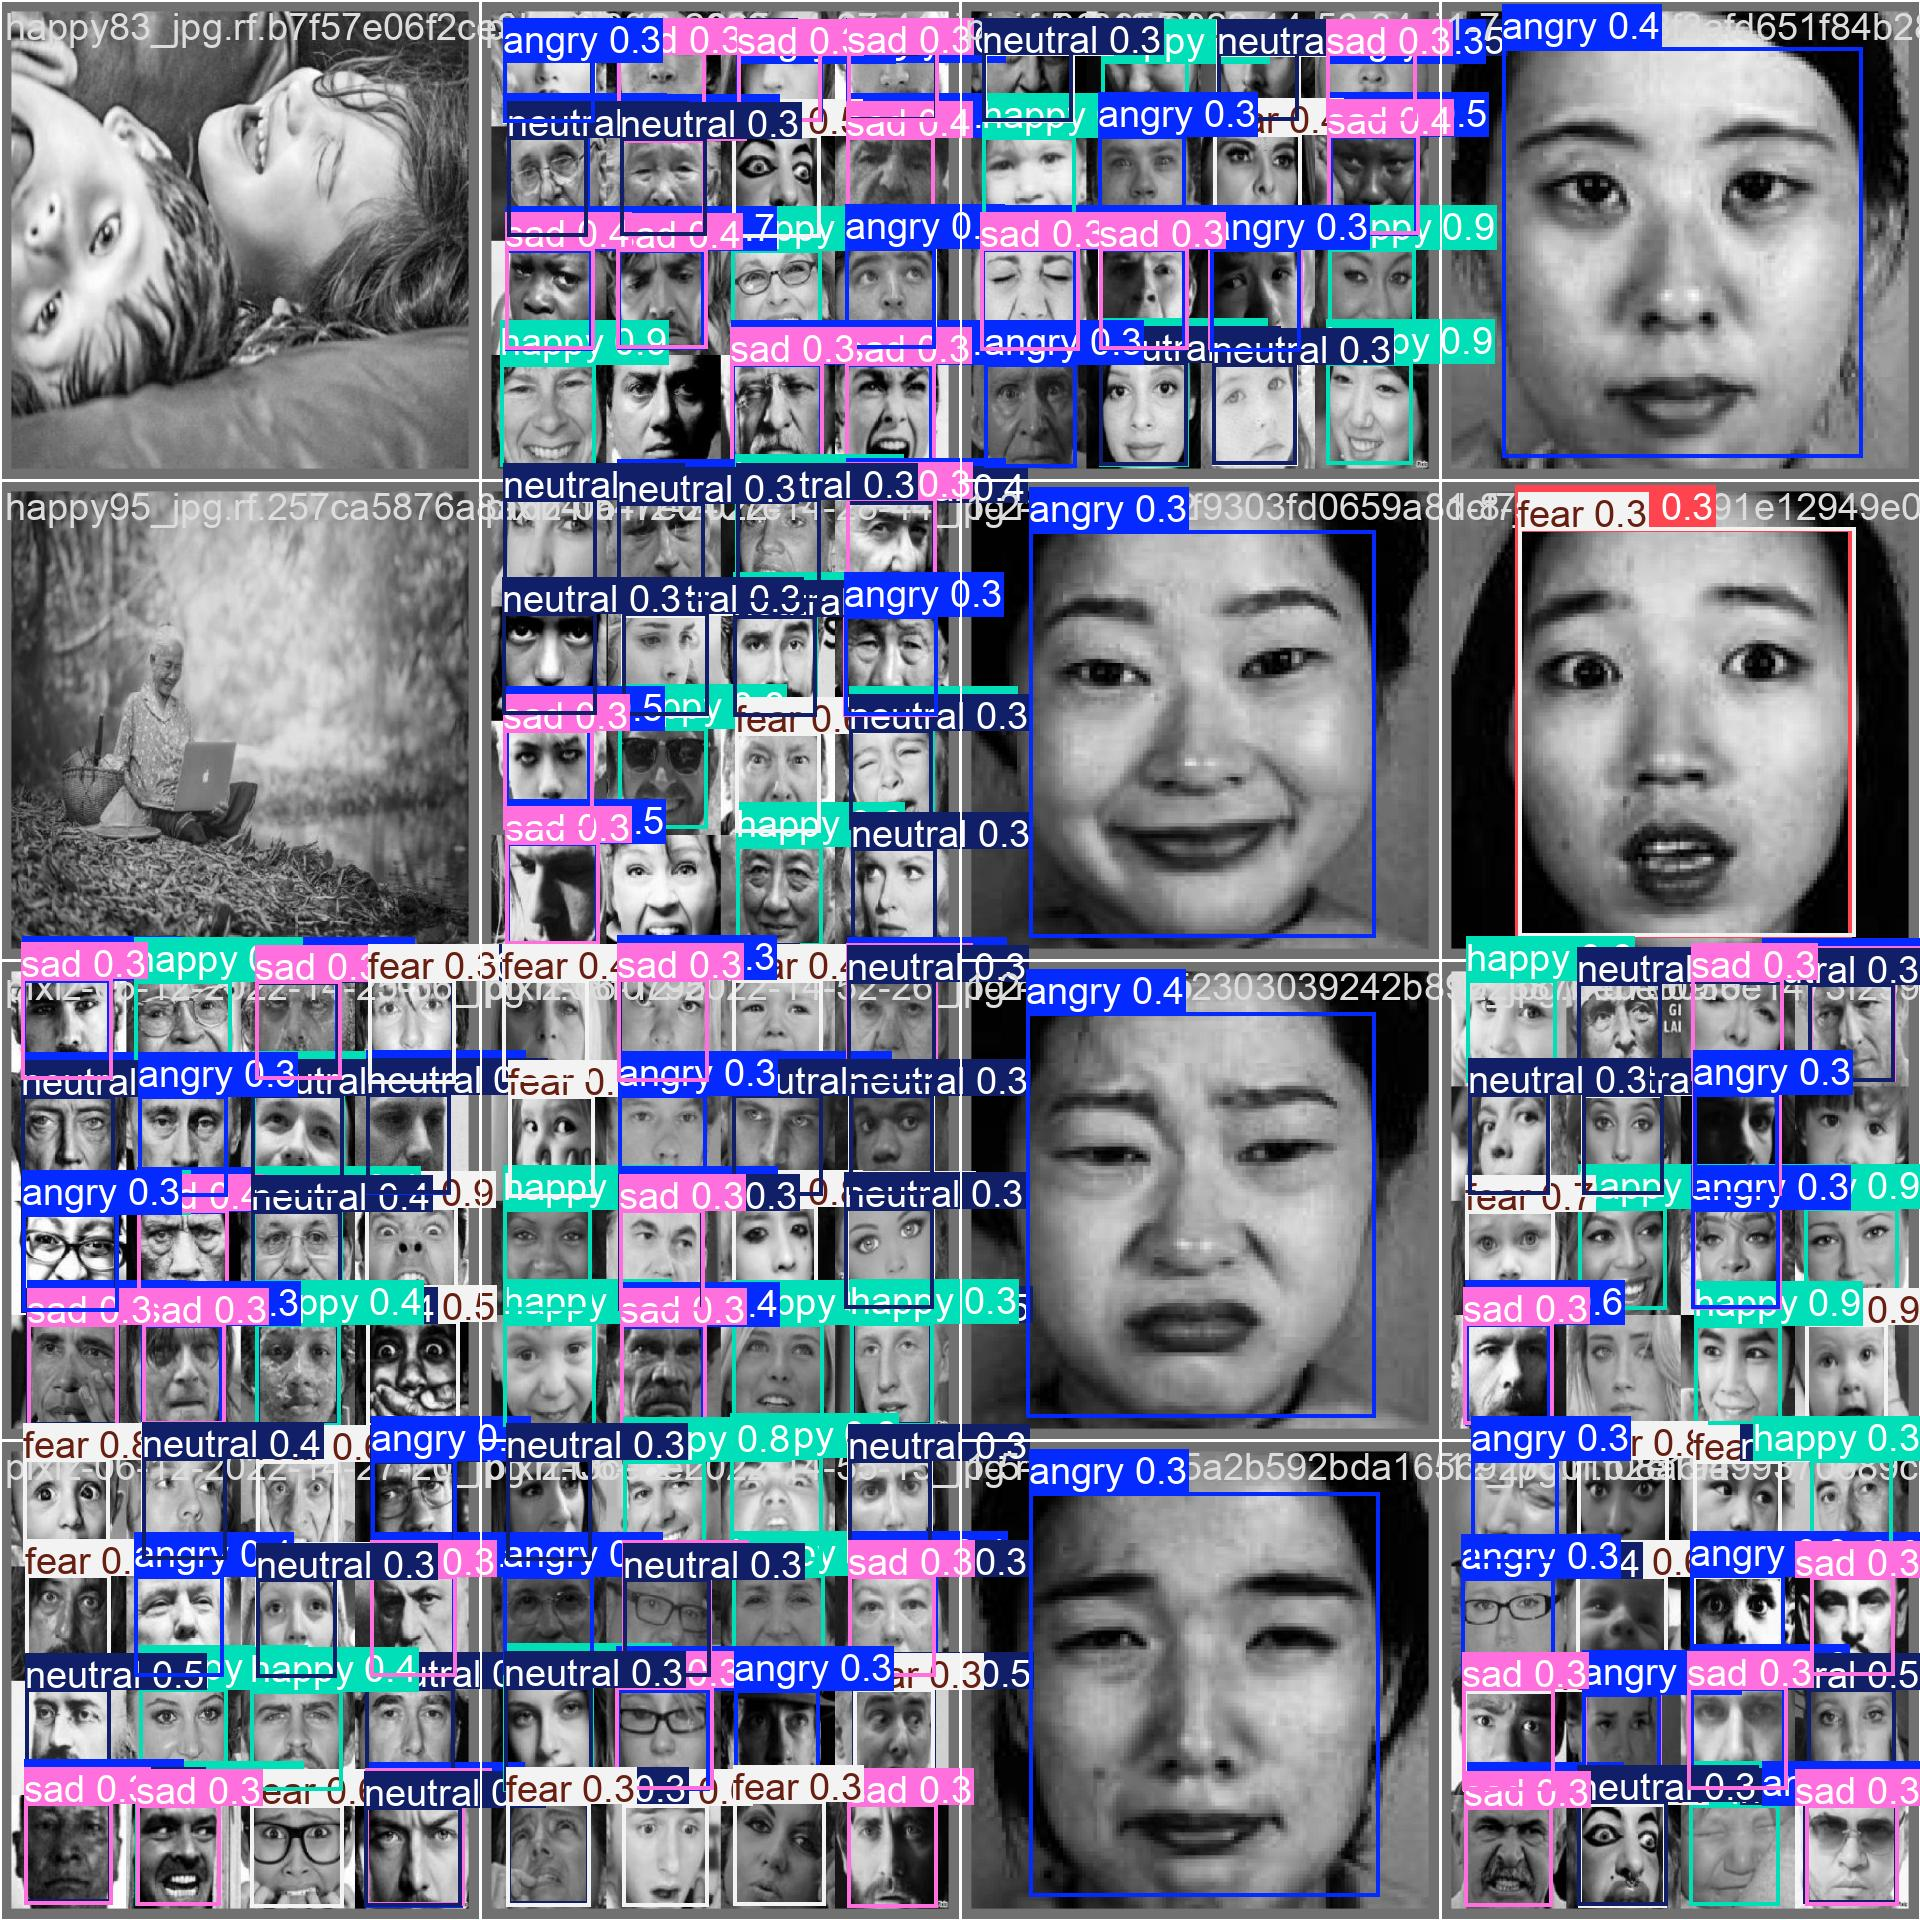

In [34]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [35]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:04<00:00,  2.49it/s]
                   all        185        862      0.552      0.692      0.654      0.547
                 angry         76        176      0.378      0.608      0.468      0.346
               disgust         18         18      0.627      0.778      0.848      0.842
                  fear         51        128       0.44      0.648      0.592      0.439
                 happy         64        180      0.703      0.748      0.813       0.58
               neutral         52        184      0.465      0.685      0.511      0.368
                   sad         64   

In [36]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 20.2ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 fear, 8.8ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 angry, 1 fear, 8.1ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 4 angrys, 4 fears, 5 happys, 7 neutrals, 3 sads, 8.0ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 3 angrys, 9 fears, 3 happys, 8 neutrals, 2 sads, 7.8ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612

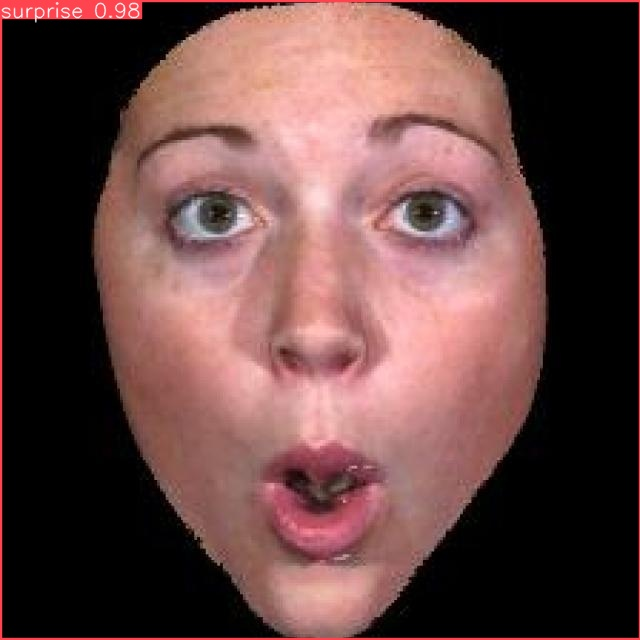

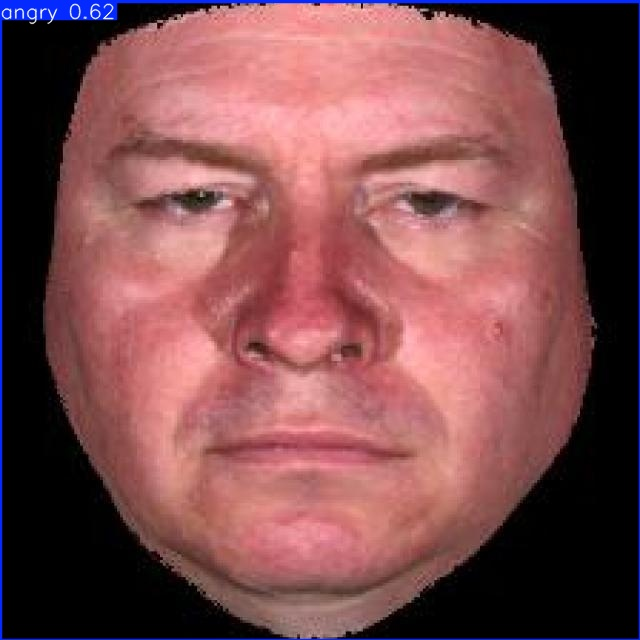

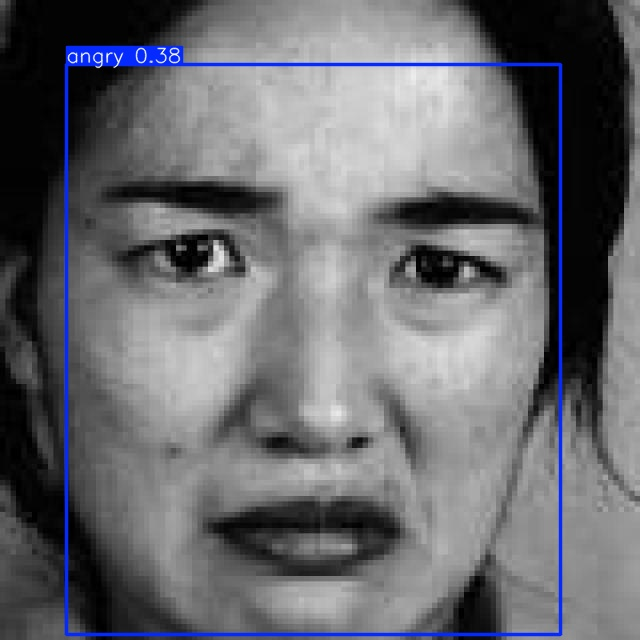

In [37]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")